# Loading in our data from main.ipynb to build the initial model

### Loading the data

In [8]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

with open("prepared_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val = data["X_val"]
X_test = data["X_test"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
num_classes = data["num_classes"]

### Data Normalization

In [9]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Building the model

In [ ]:
def leNet_model_iteration7(num_classes):
    model = Sequential()
    model.add(Conv2D(64, (5,5), activation='relu', input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = leNet_model_iteration7(num_classes)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


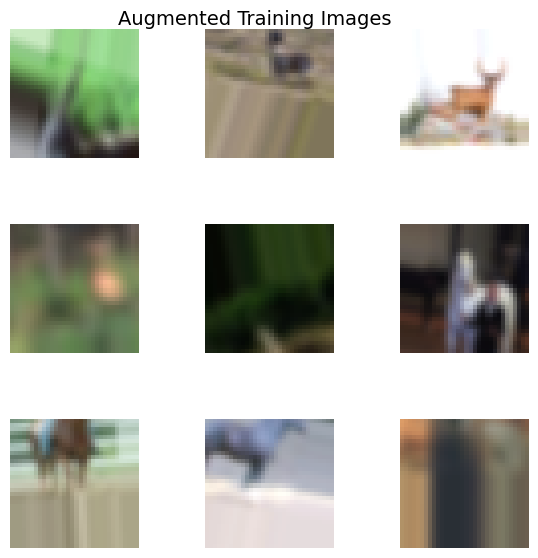

In [11]:
datagen = ImageDataGenerator(
    width_shift_range=0.5,
    height_shift_range=0.2,
    zoom_range=0.4,
    shear_range=0.3,
    rotation_range=15
)

datagen.fit(X_train)

train_generator = datagen.flow(X_train, y_train, batch_size=50)

batches = datagen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(3, 3, figsize=(6, 6))
fig.tight_layout()

for i in range(9):
    r = i // 3
    c = i % 3
    axs[r, c].imshow(X_batch[i])
    axs[r, c].axis('off')

plt.suptitle('Augmented Training Images', fontsize=14)
plt.show()

### Training the model

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 50,
    epochs=30,
    batch_size=50,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


819/819 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.1950 - loss: 2.5570 - val_accuracy: 0.3593 - val_loss: 2.0783
Epoch 2/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.2896 - loss: 2.2826 - val_accuracy: 0.3868 - val_loss: 1.9604
Epoch 3/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.3202 - loss: 2.1893 - val_accuracy: 0.3925 - val_loss: 1.9652
Epoch 4/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.3405 - loss: 2.1308 - val_accuracy: 0.3974 - val_loss: 1.9195
Epoch 5/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.3522 - loss: 2.0819 - val_accuracy: 0.4365 - val_loss: 1.8200
Epoch 6/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.3655 - loss: 2.0416 - val_accuracy: 0.4347 - val_loss: 1.7926
Epoch 7/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.3798 - loss: 2.0025 - val_accuracy: 0.4730 - val_loss: 1.7296
Epoch 8/30
819/819 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.3870 - loss: 1.9924 - val_accurac

### Evaluating the model

285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6188 - loss: 1.2005
Test Loss: 1.4763308763504028
Test Accuracy: 0.5476922988891602


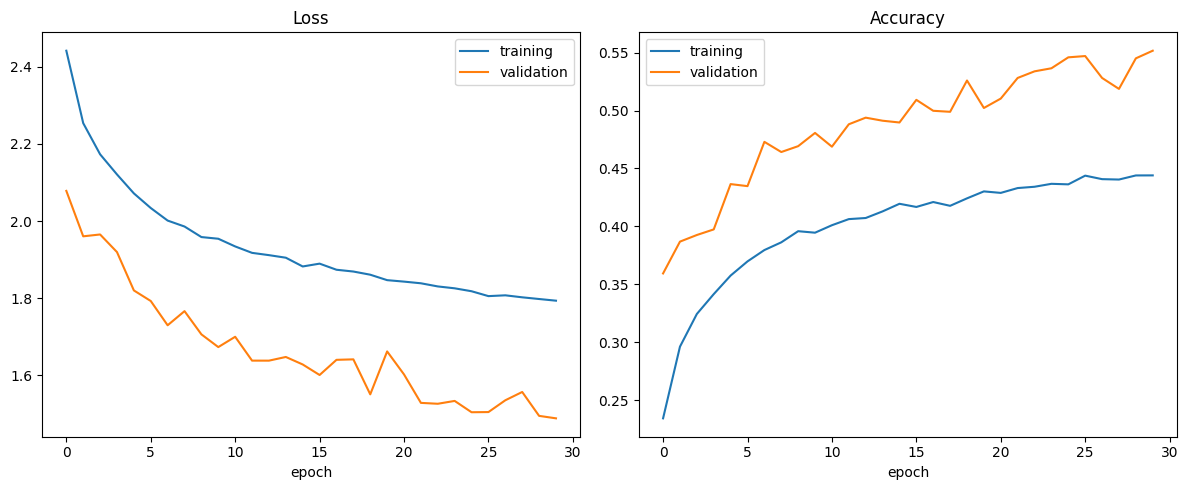

In [13]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Loss")
plt.xlabel("epoch")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

plt.tight_layout()
plt.show()
